In [1]:
import numpy as np
from sklearn.linear_model import LassoLarsIC, LogisticRegression
from matplotlib import pyplot as plt

## Ex 3

In [2]:
ns = [50, 60, 100, 150, 200, 250, 300]
L = 500
B = np.array([0.0, 1.0, 1.0]).reshape(1, 3)
MSEs = []
for n in ns:
    print(n)
    tmp_mses = []
    for _ in range(L):
        X = np.random.normal(0, 1, size=(n,2))
        X = np.concatenate([np.ones(shape=(n,1)), X], axis=1) # I add interecpt to data...

        p = 1.0/(1.0 + np.exp(-B@X.T)).flatten()
        y = np.random.binomial(n=1, p=p)


        model = LogisticRegression(penalty='none', fit_intercept=False).fit(X, y) # ...so I skip intercept here
        mse = (model.coef_.flatten() - B)**2
        mse = mse@mse.T
        tmp_mses.append(mse)
    MSEs.append(np.mean(tmp_mses))

50
60
100
150
200
250
300


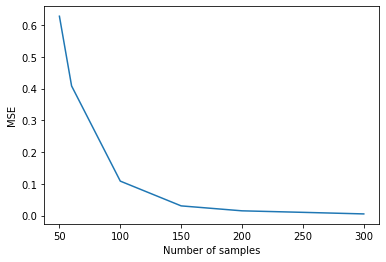

In [3]:
plt.plot(ns, MSEs)
plt.xlabel('Number of samples')
_ = plt.ylabel('MSE')